time 0.0340149402618
[[  4   6   7   9   8  19  22  13   3   7   9  14   2   4   4   3   5   9
   11   8  17  57  51  22  11  29  23  18   3   7   9   9  18  11  13  12
   77  93  91  99 119 119 119  73  30  73  98  79  17   9   7   3  60  47
   57  26  56  86  76  42  15  39  67  50   6   7   7   2  19  20  27  11
    5   7  12  18   5   7   5   4   8  13  12   6  20  26  17  16  14  17
   15  20   5  15   3   4  24  49  71  57  85  56  31  40 104 119 119 119
   12  48  29  25  10  21  28  34  34  36  31  18  42  69  84  60   5  20
   22  14]]


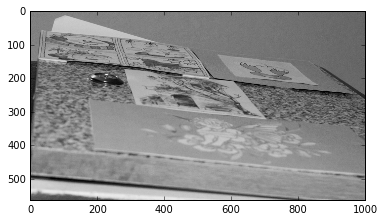

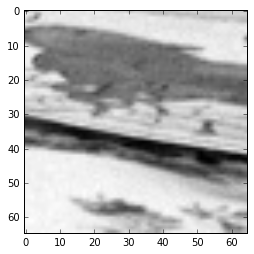

In [1]:
%matplotlib inline
import os
from pytorch_sift import SIFTNet
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/ubuntu/dev/opencv-3.1/build/lib')
import cv2
import time
import numpy as np


patch_size = 65
ON_GPU = False
SIFT = SIFTNet(patch_size = patch_size, do_cuda = ON_GPU)
SIFT.eval()
if ON_GPU:
    SIFT.cuda()
    
image = cv2.imread('img/fox.png',0)
plt.figure()
plt.imshow(image, cmap="gray")

h,w = image.shape
patch = image[h/4: h/4 + patch_size,w/3 : w/3 + patch_size]
plt.figure()
plt.imshow(patch, cmap="gray")

# It takes n_patches x 1 x patch_size x patch_size input
patches = np.ndarray((1, 1, patch_size, patch_size), dtype=np.float32)
patches[0,0,:,:] = patch


t = time.time()
if ON_GPU:
     Variable(torch.from_numpy(patches).cuda(), volatile=True)
else:
    torch_patches = Variable(torch.from_numpy(patches), volatile=True)

res = SIFT(torch_patches)
sift = np.round(512. * res.data.cpu().numpy()).astype(np.int32)
print 'time', time.time() - t
print sift